<a href="https://colab.research.google.com/github/Venggar/personal-projects/blob/main/Wheelchair_Accessibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataCamp Certification Case Study

### Project Brief

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

## Basic Analysis

Let us start! Firstly, packages for analysis are to be imported. Some basic analysis on the dataset were done, such as finding the number of NaN values as well as examining the various data types available. Summary statistics were also calculated. I had a hunch that there could be the same venue_name for some records, so the number of unique venue names are also going to be found

In [ ]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
df = pd.read_csv("data/event_venues.csv")
df.head()

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


In [ ]:
df.isnull().sum()

venue_name                    0
Loud music / events           0
Venue provides alcohol        0
Wi-Fi                         0
supervenue                    0
U-Shaped_max                  0
max_standing                  0
Theatre_max                   0
Promoted / ticketed events    0
Wheelchair accessible         0
dtype: int64

In [ ]:
df.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.713299,35.045455,114.203581,112.715867
std,0.452278,43.937591,272.269943,131.853249
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,35.045455,0.000000,80.000000
50%,1.000000,35.045455,50.000000,112.715867
75%,1.000000,35.045455,120.000000,112.715867
max,1.000000,2520.000000,7500.000000,4000.000000


In [ ]:
len(df['venue_name'].unique())

1444

There are 1444 unique venues in the dataset, less than the number of rows. To investigate further, I examined one example.

In [ ]:
df[df.duplicated(['venue_name'], keep=False)]['venue_name']

0                  techspace aldgate east
1                       green rooms hotel
2                   148 leadenhall street
3                             conway hall
4                       gridiron building
                      ...                
3905                  the hurlingham club
3906           landmark - aldgate, london
3907    ortus conference and events venue
3908                     30 euston square
3909                       broadway house
Name: venue_name, Length: 3323, dtype: object

In [ ]:
df[df.venue_name == 'gridiron building']

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
198,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
243,gridiron building,False,0,True,False,15.000000,0,20.000000,False,False
569,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
1066,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
1154,gridiron building,False,0,True,False,20.000000,0,20.000000,False,False
1335,gridiron building,False,0,True,False,35.045455,0,96.000000,False,False
1404,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
1477,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
1856,gridiron building,False,0,True,False,35.045455,0,40.000000,False,False


Some records share exactly the same exact values. Duplicates shall be dropped. Afterwards, we investigate for class imbalance.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Wheelchair accessible'].value_counts(normalize = True)

True     0.521098
False    0.478902
Name: Wheelchair accessible, dtype: float64

There is indeed some class imbaalance, though it shouldn't be desruptive enough for our machine learning model. Next up, we train a "dummy" XGBoost model to view the feature importances to our target.

[08:45:46] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


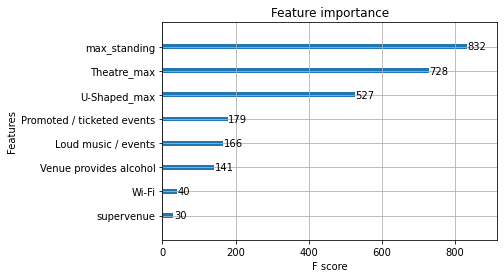

In [ ]:
dummy_model = xgb.XGBClassifier(verbose = False)

dumb_X = df.drop(['Wheelchair accessible', 'venue_name'], axis = 1)
dumb_y = df['Wheelchair accessible']

dummy_model.fit(dumb_X,dumb_y)
xgb.plot_importance(dummy_model);

From what it looks like, the most important feature that decides whether or not a venues is wheelchair accessible is the total standing capacity of the venue, followed by the the total capacity of the theatre and the total capacity of the u-shaped portion of the theatre. These three features seem to be much more important predictors than the other features. Whether the event was promoted, involved loud music, and provded alcohol are also predictors, though not as strong as the previous three.

With those important features in mind, let us investigate the data with a strong emphasis on the three most important features. First of all we shall look for the distribution of these features.

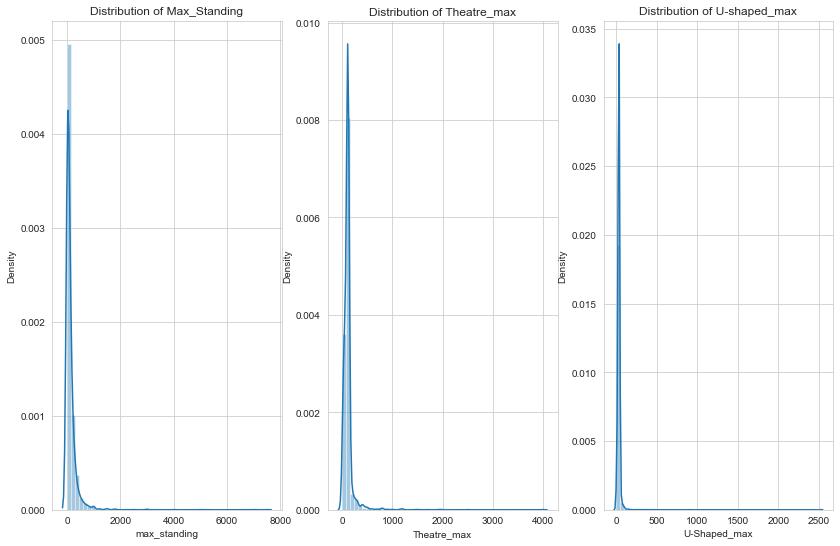

In [ ]:
sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 3, figsize = (14,9))

sns.distplot(df['max_standing'], ax = axes[0])
sns.distplot(df['Theatre_max'], ax =axes[1])
sns.distplot(df['U-Shaped_max'], ax = axes[2])

axes[0].set_title('Distribution of Max_Standing')
axes[1].set_title('Distribution of Theatre_max')
axes[2].set_title('Distribution of U-shaped_max');

It seems like all three features are very skewed and not quite normal. It's probably best to use a model that handles outliers well and does not require a normally distributed range of values. To investigate the relationships further, we make a violin plot and calculate some summary statistics to get an idea for the spread of the data.

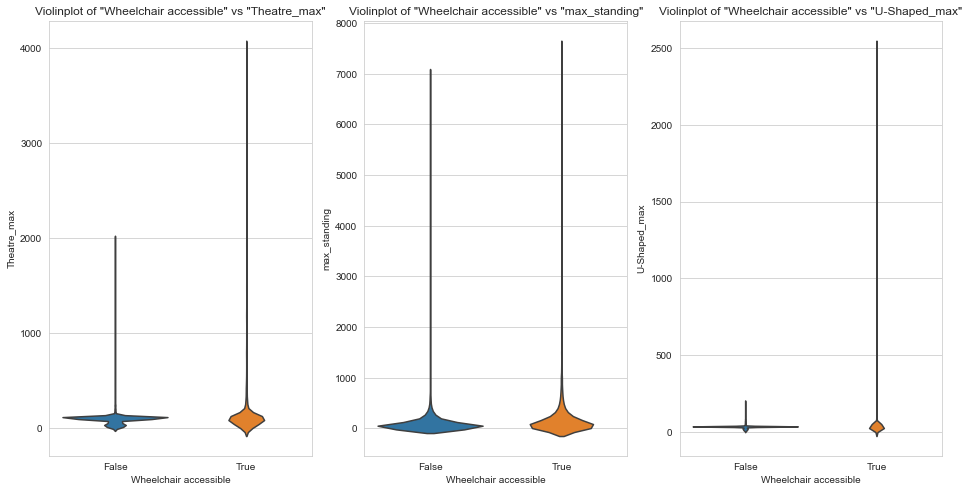

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (16,8))

sns.violinplot(data = df, x = 'Wheelchair accessible', y = 'Theatre_max', ax =axes[0], inner = None)
sns.violinplot(data = df, x = 'Wheelchair accessible', y = 'max_standing', ax =axes[1], inner = None)
sns.violinplot(data = df, x = 'Wheelchair accessible', y = 'U-Shaped_max', ax =axes[2], inner = None)

axes[0].set_title('Violinplot of "Wheelchair accessible" vs "Theatre_max"')
axes[1].set_title('Violinplot of "Wheelchair accessible" vs "max_standing"')
axes[2].set_title('Violinplot of "Wheelchair accessible" vs "U-Shaped_max"');

In [ ]:
summary_stats = df.groupby(['Wheelchair accessible'])['Theatre_max','max_standing','U-Shaped_max'].agg({np.mean,  np.median, np.std}).reset_index()
summary_stats

Wheelchair accessible Theatre_max                         max_standing  \
                             median         std        mean       median   
0                 False  112.715867   61.881722   99.178957           50   
1                  True  112.715867  181.714249  126.254199           80   

                          U-Shaped_max                        
          std        mean       median        std       mean  
0  205.152138   88.500302    35.045455   9.821951  33.734131  
1  340.128690  161.212424    35.045455  63.908435  36.342661

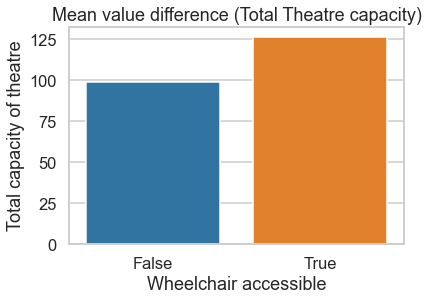

In [ ]:
#The barplots below are for the oral presentation, they are just visualizations for the summary statistics
sns.set_context("talk")
ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'Theatre_max', estimator = np.mean, ci =False);
ax.set_ylabel('Total capacity of theatre');
ax.set_title('Mean value difference (Total Theatre capacity)');



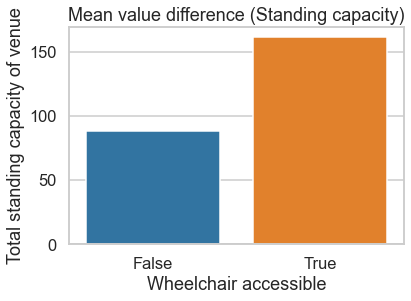

In [ ]:

sns.set_context("talk")
ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'max_standing',estimator = np.mean, ci =False);
ax.set_ylabel('Total standing capacity of venue')
ax.set_title('Mean value difference (Standing capacity)');



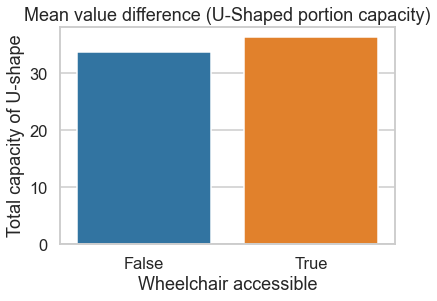

In [ ]:

sns.set_context("talk")
ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'U-Shaped_max', estimator = np.mean,  ci =False);
ax.set_ylabel('Total capacity of U-shape');
ax.set_title('Mean value difference (U-Shaped portion capacity)');


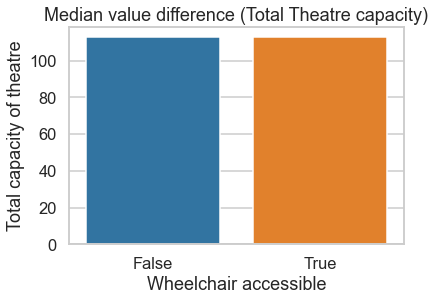

In [ ]:
#For presentation
sns.set_context("talk")
ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'Theatre_max', estimator = np.median,  ci =False);
ax.set_ylabel('Total capacity of theatre');
ax.set_title('Median value difference (Total Theatre capacity)');


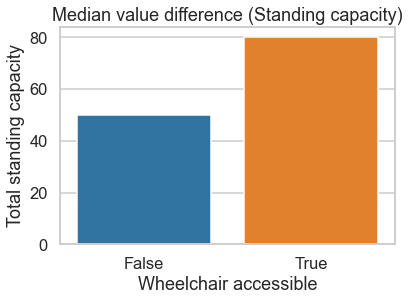

In [ ]:
sns.set_context("talk")
ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'max_standing', estimator = np.median,  ci =False);
ax.set_ylabel('Total standing capacity')
ax.set_title('Median value difference (Standing capacity)');


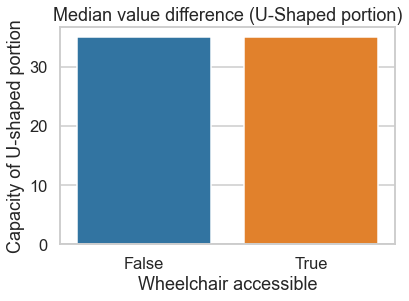

In [ ]:
sns.set_context("talk")

ax = sns.barplot(data = df, x = 'Wheelchair accessible', y = 'U-Shaped_max', estimator = np.median,  ci =False);
ax.set_ylabel('Capacity of U-shaped portion');
ax.set_title('Median value difference (U-Shaped portion)');


The violin plots describe the distribution of the three most important features in accordance to whether or not the venue was wheelchair accessible. Some features of the violin plots confirms what we observed with the distribution plots.

Notable observations:

1. Most records in the dataset have relatively low values for the three features.
2. For all three features, there exists substantial outliers as shown by the long "whiskers" of the violin plots.
3. For all three variables, "wheelchair accessible" venues tend to fall into a more equally distrbuted range than the "Non-wheelchair venues" as 
   the main bodies of the violin plots of "non-wheelchair accessible" venues tend to be more "vertically compressed".
4. The outliers of "accessible venues" are more drastic than the ones for non-wheelchair accessible venues, as evidenced by the longer whiskers for  for all three features. 

The cell below which calculates the summary statistics are also interesting. Apparently the median value for both 'Theatre_max' and 'U-Shaped_max' are exactly the same for both cases, but the means are different. This shows how strong the outliers in the wheelchair accessible venues are in affecting the mean (and the spread of the data). For 'Theatre_max' the mean is nearly 30 units different.  

Now we turn our heads to the next three most important features that were detected: 'Promoted / ticketed events', 'Loud music / events', and 'Venue provides alcohol'. The barplot shown below is the number of wheelchair accessible/inaccessbile venue hue-seperated by whether they had all three of these features or none of them at all. Below I call these features ('Promoted / ticketed events', 'Loud music / events', and 'Wi-Fi') as "extra features".

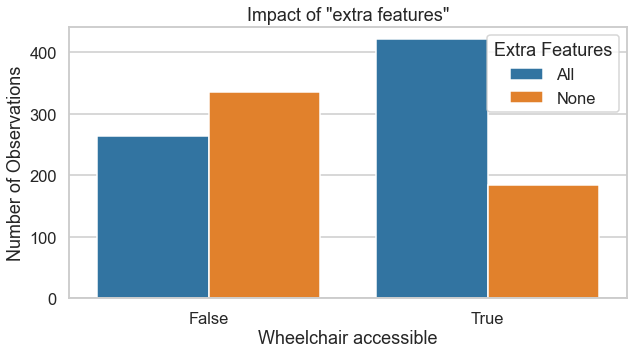

In [ ]:
#For presentation

gb_other_features = df.groupby(['Wheelchair accessible','Promoted / ticketed events', 'Loud music / events', 'Venue provides alcohol'])['venue_name'].count().reset_index()
gb_other_features = gb_other_features.rename(columns = {'venue_name' : 'counts'})
df1 = pd.DataFrame({"Wheelchair accessible" : [True, True,False, False], 'Extra Features' : ['All', 'None', 'All', 'None']})

t_t_count = gb_other_features.loc[15, 'counts']
t_f_count = gb_other_features.loc[8, 'counts']
f_t_count = gb_other_features.loc[7, 'counts']
f_f_count = gb_other_features.loc[0, 'counts']

df1['count'] = [t_t_count, t_f_count, f_t_count, f_f_count]
sns.set_context("talk")
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(data=df1, x = 'Wheelchair accessible' , y =  'count' , hue = 'Extra Features')
ax.set_ylabel('Number of Observations')
ax.set_title('Impact of "extra features"');


From the plot above, the data shows that most wheelchair accessible venues tend to have all of the "extra features" while most wheelchair inaccessible venues tend to have none of these "extra features". These extra features share similar F-scores as calculated by our dummy XGBoost model, and I decided to combine them into one feature to prevent overfitting. 

### Feature Engineering 

The first thing I decided to do was to drop the name of the venue as well as the three least important features in the dataset. As an extra measure, I also decided to change all True/False values to 1's and 0's. After experimenting, I found that adding up all the "extra features" yielded the best model performance. 

The case study document mentioned that it is ideal to have at least two-thirds of venues predicted to be without a ramp to not have a ramp. In order to avoid confusion (double-negatives) and make it easier to intrepret cross validation, I decided to change the target to be "needs_ramp", which is "True" when 'Wheelchair accessible' is "False" and "False" when "Wheelchair accessible" is True. 


In [ ]:
#Drop unnecessary features that did not have high F-scores as well as the venue names.
feed = df.copy()
feed = df.drop(['venue_name', 'Wi-Fi','supervenue'], axis = 1)


#Make sure all three "extra features" are changed to integers.
feed['Loud music / events'] = feed['Loud music / events'].apply(lambda x: 1 if x == True else 0) 
feed['Promoted / ticketed events'] = feed['Promoted / ticketed events'].apply(lambda x: 1 if x == True else 0) 

#Feature engineering: sum of all extra features
feed['extra_features'] = feed['Loud music / events'] + feed['Promoted / ticketed events'] + feed['Venue provides alcohol']



#Change the target to make it less confusing during cross validation. The "positive class" shall be whether the event needed a ramp
feed['Wheelchair accessible'] = feed['Wheelchair accessible'].apply(lambda x: 1 if x == True else 0) 
feed['needs_ramp'] = feed['Wheelchair accessible'].apply(lambda x: 0 if x == 1 else 1)

#drop all the features that have been changed
feed = feed.drop(['Wheelchair accessible','Promoted / ticketed events', 'Loud music / events' ,'Venue provides alcohol' ], axis =1 )

X = feed.drop(['needs_ramp'], axis =1)
y = feed['needs_ramp']
X.head()

,U-Shaped_max,max_standing,Theatre_max,extra_features
0,35.045455,0,112.715867,0
1,40.000000,120,80.000000,3
2,35.045455,0,112.715867,0
3,35.045455,60,60.000000,0
4,35.045455,0,112.715867,0


### Model Building

For the model, I decided to go with XGBoost classifier for these reasons:

1. It is quite robust to outliers, so there is no need for scaling beforehand
2. It is well known for its high performance with fairly little model tuning
3. We have a classification problem (duh)

As our initial model, I decided to go with XGBoost model with 900 estimators and 3 for depth, as well as 0.25 for colsample_bytree and colsample_bylevel. An initial diagnostic is done on some randomly generated training and test set by examining its logloss.

In [ ]:
#Imports for machine learning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


In [ ]:
#Train test split to configure our initial model.

X_train, X_test, y_train, y_test  = train_test_split(X,y,random_state = 42, test_size = 0.2)


In [ ]:
#building the initial model

initial_model =  xgb.XGBClassifier(n_estimators= 900,depth = 3, colsample_bytree = 0.25, colsample_bylevel = 0.25, verbose =False)

evalset = [(X_train, y_train), (X_test,y_test)]

initial_model.fit(X_train, y_train,eval_set=evalset)


[08:45:50] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68556	validation_1-logloss:0.68854
[1]	validation_0-logloss:0.65813	validation_1-logloss:0.66184
[2]	validation_0-logloss:0.65111	validation_1-logloss:0.65582
[3]	validation_0-logloss:0.64696	validation_1-logloss:0.65245
[4]	validation_0-logloss:0.63519	validation_1-logloss:0.64123
[5]	validation_0-logloss:0.62826	validation_1-logloss:0.63538
[6]	validation_0-logloss:0.62636	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.25,
              colsample_bynode=1, colsample_bytree=0.25, depth=3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=False,
              verbosity=None)

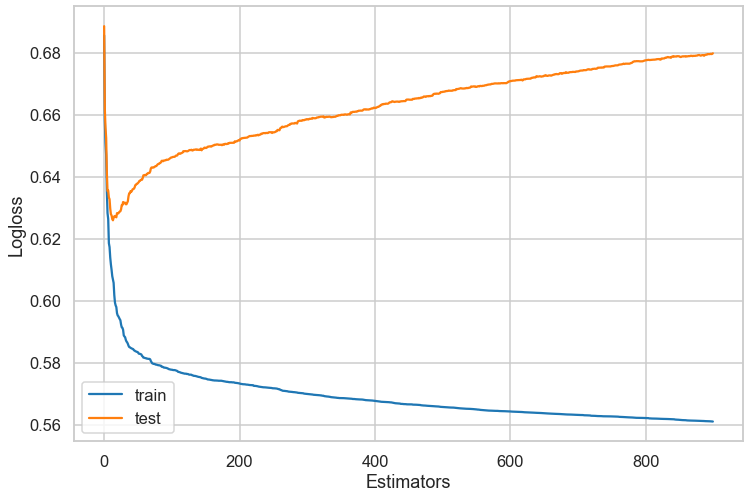

In [ ]:
#Plotting the model's logless by iteration

inital_results = initial_model.evals_result()
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(inital_results['validation_0']['logloss'], label='train')
plt.plot(inital_results['validation_1']['logloss'], label='test')
plt.xlabel('Estimators')
plt.ylabel('Logloss')
plt.legend();


Unsurprisingly, the model overfitted. So, it seems like we need to configure regularization parameters. To get the best parameters in the least time, the parameter search is done with RandomizedSearchCV. It still  took a few minutes though.

In [ ]:
param_grid = {
                'alpha' : np.arange(10,35,5),
                'min_child_weight' : np.arange(16,36,4),
                'reg_lambda': np.arange(15,35,5),
                'eta' : np.arange(0.0025, 0.007, 0.0015)
    
                }

rcv = RandomizedSearchCV(estimator= initial_model, param_distributions = param_grid, scoring= 'precision_micro',  cv=5, verbose=0, n_iter = 3, random_state = 42)
rcv.fit(X,y)
print(rcv.best_params_)
print(rcv.best_score_)

[08:48:49] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:55] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

In [ ]:
#Final model, NOTE : I eventually decided to take only the min_child_weight parameter given by the randomized search and tune the rest manually.
#The model below yielded the best results.
from sklearn.metrics import precision_score

final_model = xgb.XGBClassifier(n_estimators= 900, depth = 3,  alpha = 20, colsample_bytree = 0.25,  colsample_bylevel = 0.25, min_child_weight = 24, reg_lambda = 25, eta = 0.007, verbose = False)
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)
precision_score(y_test,predictions, average  = 'micro')

[09:02:34] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6705202312138728

In [ ]:
#Cross validation accross multiple metrics

crv = cross_validate(final_model, X, y, scoring=['precision_micro', 'accuracy'], cv =5)


[09:02:38] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:02:41] WARNING: ../src/learner.cc:541: 
Parameters: { depth, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

In [ ]:
#Printing cross val results

crv_df = pd.DataFrame(crv)

print('The average precision accross 5 fold cross validation is ' ,crv_df['test_precision_micro'].mean())
print('The maximum precision accross 5 fold cross validation is ' ,crv_df['test_precision_micro'].max())
print('The median precision accross 5 fold cross validation is ' ,crv_df['test_precision_micro'].median())
print('The minimum precision accross 5 fold cross validation is ' ,crv_df['test_precision_micro'].min())


The average precision accross 5 fold cross validation is  0.6537572254335261
The maximum precision accross 5 fold cross validation is  0.6719653179190751
The median precision accross 5 fold cross validation is  0.661849710982659
The minimum precision accross 5 fold cross validation is  0.6271676300578035


### Summary and Conclusion

- The most prominent features had something to do with the capacity of the venue for the venue


- Accross the cross validation tests, an average precision of around 65.4% was achieved, with the model hovering around 62.7% minimum to 67.2% maximum. The median 
  performance of the final model was around 66.2%. On average, the model should predict correctly which venues require a ramp around 65.4% of the time. This is not     quite the level of performance asked (2/3 or around 66.7%) but given the amount and quality of the data, I consider it as a good performing model for the problem at     hand.
   
- Recommendations:
  1. There could be more/better quality data; The performance of the machine learning model should go up with more data. Some of the records were duplicates and many had the same exact values.
  2. Since the most prominent feature had something to do with capacty related metrics (most prominently standing capacity), the user should look out for venues with      lower capacity values as an important feature to take note off, though they should not put a lot of reliability on it. Other features such as whether the venue        is ticketed, involves music and alcohol should also be taken note off. 
  3. The model can be used as a validation tool after the user has narrowed done some possibilities.


